# Holiday Package Prediciton

## 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    ConfusionMatrixDisplay, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Data Cleaning

### Check Value Count of Categorical Variables

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [11]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

**We can see the problem with two Categorical Features i.e., Gender and Marital Status**

**Let's fix those features**

In [12]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried', 'Single')

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

### Checking Missing Values

In [15]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


### Description on Numerical Data (Null Columns)

In [16]:
df[features_with_na].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [18]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Drop Unncessary Columns

In [19]:
df = df.drop('CustomerID', axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

### Feature Extraction

In [20]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

df = df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


**Get Numeric Features**

In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Number of Numeric Features: {len(numeric_features)}")

Number of Numeric Features: 12


**Get Categorical Features**

In [22]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Number of Categorical Features: {len(categorical_features)}")

Number of Categorical Features: 6


**Get Discrete Features**

In [23]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print(f"Number of Discrete Features: {len(discrete_features)}")

Number of Discrete Features: 9


**Get Continuous Features**

In [24]:
continuous_features = [feature for feature in numeric_features if feature not in discrete_features]
print(f"Number of Continuous Features: {len(continuous_features)}")

Number of Continuous Features: 3


## Train Test Split

In [25]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

### Dealing with Categorical Features

In [27]:
categorical_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
one_hot_encoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_encoder, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features)
    ]
)

In [28]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Model Training

In [29]:
models = {
    "Random Forest": RandomForestClassifier()  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy:.2f}")
    print(f"- F1 score: {model_train_f1:.2f}")
    print(f"- Precision: {model_train_precision:.2f}")
    print(f"- Recall: {model_train_recall:.2f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.2f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f'- Accuracy: {model_test_accuracy:.2f}')
    print(f'- F1 score: {model_test_f1:.2f}')
    print(f'- Precision: {model_test_precision:.2f}')
    print(f'- Recall: {model_test_recall:.2f}')
    print(f'- Roc Auc Score: {model_test_rocauc_score:.2f}')

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 1.00
- Precision: 1.00
- Recall: 1.00
- Roc Auc Score: 1.00
----------------------------------
Model performance for Test set
- Accuracy: 0.92
- F1 score: 0.92
- Precision: 0.94
- Recall: 0.62
- Roc Auc Score: 0.81




## Hyperparameter Tuning

In [30]:
model = RandomForestClassifier()

param_grid = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

In [31]:
randomized_cv_models = [
    ("RandomForest", model, param_grid)
]

In [32]:
model_param = {}

for name, model, params in randomized_cv_models:
    randomized_model = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    randomized_model.fit(X_train, y_train)
    model_param[name] = randomized_model.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RandomForest -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}


In [33]:
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=500, min_samples_split=2,
        max_features=8, max_depth=None
    )  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy:.2f}")
    print(f"- F1 score: {model_train_f1:.2f}")
    print(f"- Precision: {model_train_precision:.2f}")
    print(f"- Recall: {model_train_recall:.2f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.2f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f'- Accuracy: {model_test_accuracy:.2f}')
    print(f'- F1 score: {model_test_f1:.2f}')
    print(f'- Precision: {model_test_precision:.2f}')
    print(f'- Recall: {model_test_recall:.2f}')
    print(f'- Roc Auc Score: {model_test_rocauc_score:.2f}')

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 1.00
- Precision: 1.00
- Recall: 1.00
- Roc Auc Score: 1.00
----------------------------------
Model performance for Test set
- Accuracy: 0.93
- F1 score: 0.93
- Precision: 0.95
- Recall: 0.68
- Roc Auc Score: 0.84




## Plotting ROC AUC Curve

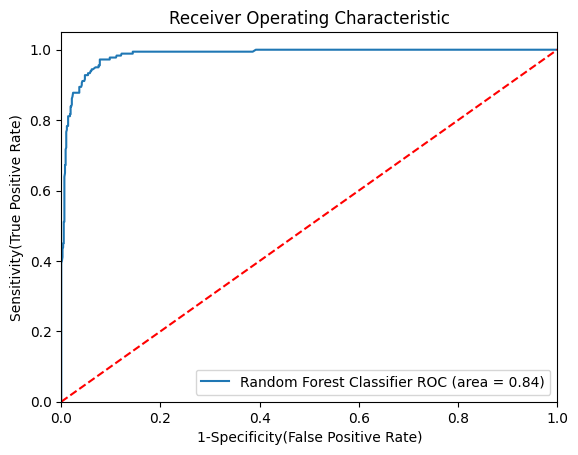

In [34]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(
        n_estimators=500, min_samples_split=2,
        max_features=8, max_depth=None
    ),
    'auc':  0.84
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 